# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

We will collect Ethereum trading data from www.coingecko.com in this project. Data taken daily includes market capitalization, trading volume, opening price, and closing price. After that we can create chart of trading volume to find out the trendline of ethereum.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


In [5]:
items = table.find_all('tr')

We can use "Inspect Elements" tool in our browser, so we knew that Ethereum trade data are nested in <tbody> and each rows is nested in tr. Afterward we have to pull those things using find() function.

In [6]:
temp = []

for i in range(0, len(items)):
    
    # Scrapping process
    item = items[i]
    date = item.find('th').text.strip()
    market_cap = item.find_all('td')[0].text.strip().replace('$', '').replace(',','')
    volume = item.find_all('td')[1].text.strip().replace('$', '').replace(',','')
    open = item.find_all('td')[2].text.strip().replace('$', '').replace(',','')
    close = item.find_all('td')[3].text.strip().replace('$', '').replace(',','')
    
    # Store every data in temp
    temp.append((date, market_cap, volume, open, close))

We want to remove every whitespace and USD sign. Then  use strip() function to remove every white space and replace() function to remove USD sign.

In [8]:
temp[1:10]

[('2021-06-29', '243040539437', '30629329806', '2087.52', '2169.40'),
 ('2021-06-28', '229354016311', '24316408028', '1973.93', '2087.52'),
 ('2021-06-27', '209989265221', '24249510321', '1817.05', '1973.93'),
 ('2021-06-26', '213871849532', '25981381067', '1833.46', '1817.05'),
 ('2021-06-25', '231644258719', '22447489242', '1990.08', '1833.46'),
 ('2021-06-24', '229518675837', '28098744045', '1971.11', '1990.08'),
 ('2021-06-23', '216876757209', '38755019937', '1875.36', '1971.11'),
 ('2021-06-22', '223202708789', '39499960408', '1900.12', '1875.36'),
 ('2021-06-21', '261478202409', '26235850447', '2251.56', '1900.12')]

Due to the 'Date'ordered in ascending, we'll  change the order to descending (easier to understand)

In [9]:
temp = temp[::-1]

In [11]:
temp[0:10]

[('2020-01-01', '14097451632', '7103187151', '129.19', '130.48'),
 ('2020-01-02', '14230588104', '6623732041', '130.48', '127.05'),
 ('2020-01-03', '13859793330', '6497297884', '127.05', '133.70'),
 ('2020-01-04', '14613194776', '9655245100', '133.70', '134.14'),
 ('2020-01-05', '14636213160', '6958393690', '134.14', '135.01'),
 ('2020-01-06', '14738834254', '7260645128', '135.01', '143.81'),
 ('2020-01-07', '15692578635', '9514201882', '143.81', '143.02'),
 ('2020-01-08', '15656491188', '9440938788', '143.02', '140.27'),
 ('2020-01-09', '15364547562', '10095847759', '140.27', '137.86'),
 ('2020-01-10', '14998595868', '7280640218', '137.86', '144.60')]

## Creating data frame & Data wrangling

Put the array into dataframe using DataFrame function in Pandas

In [12]:
import pandas as pd
df = pd.DataFrame(temp, columns=('Date', 'Market Cap', 'Volume', 'Open', 'Close'))
df.head()

,Date,Market Cap,Volume,Open,Close
0,2020-01-01,14097451632,7103187151,129.19,130.48
1,2020-01-02,14230588104,6623732041,130.48,127.05
2,2020-01-03,13859793330,6497297884,127.05,133.70
3,2020-01-04,14613194776,9655245100,133.70,134.14
4,2020-01-05,14636213160,6958393690,134.14,135.01


In [14]:
df.tail()

,Date,Market Cap,Volume,Open,Close
542,2021-06-26,213871849532,25981381067,1833.46,1817.05
543,2021-06-27,209989265221,24249510321,1817.05,1973.93
544,2021-06-28,229354016311,24316408028,1973.93,2087.52
545,2021-06-29,243040539437,30629329806,2087.52,2169.40
546,2021-06-30,253607549372,27149143847,2169.40,N/A


Do the data cleaning here - Check 'N/A' value in df

In [13]:
df.isna().sum()

Date          0
Market Cap    0
Volume        0
Open          0
Close         0
dtype: int64

Change every 'N/A' with 0 (null)

In [15]:
df.replace({'N/A':int('0')}, inplace=True)

Check type of every data

In [16]:
df.dtypes

Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

We have to change  data type 
Date should be datetime64 and
others should be float64

In [17]:
df['Date'] = df['Date'].astype('datetime64')
df[['Market Cap', 'Volume', 'Open', 'Close']] = df[['Market Cap', 'Volume', 'Open', 'Close']].astype('float')
df.dtypes

Date          datetime64[ns]
Market Cap           float64
Volume               float64
Open                 float64
Close                float64
dtype: object

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

We will cretae a graph of of 'Volume' over time. So we have to set 'Date' as an index.

In [18]:
df = df.set_index('Date')

'Volume' movement in line graph

<AxesSubplot:xlabel='Date'>

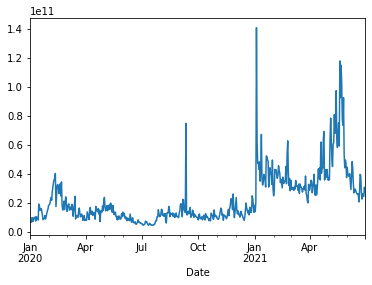

In [19]:
df['Volume'].plot.line()

In [21]:
df.describe()

,Market Cap,Volume,Open,Close
count,5.470000e+02,5.470000e+02,547.000000,547.000000
mean,1.018994e+11,2.244515e+10,888.237367,888.001188
std,1.081609e+11,1.812490e+10,930.603914,930.813277
min,1.195663e+10,4.344880e+09,110.600000,0.000000
25%,2.522716e+10,1.040704e+10,227.845000,227.845000
50%,4.369277e+10,1.503386e+10,387.720000,387.720000
75%,1.824718e+11,3.094427e+10,1580.530000,1580.530000
max,4.813810e+11,1.409065e+11,4182.790000,4182.790000


The total volume in every year

In [25]:
df = df.reset_index()
df['Year'] = df['Date'].dt.to_period('Y')
df.groupby(by='Year')['Volume'].sum()

Year
2020    4.755115e+12
2021    7.522383e+12
Freq: A-DEC, Name: Volume, dtype: float64

the minimum value of Volume is 4.344880e+09 on 2020-07-18

In [26]:
df[df['Volume'] == df['Volume'].min()]

,Date,Market Cap,Volume,Open,Close,Year
199,2020-07-18,2.601517e+10,4.344880e+09,232.78,235.68,2020


the maximum value of Volume is 1.409065e+11 on 2021-01-04

In [24]:
df[df['Volume'] == df['Volume'].max()]

,Market Cap,Volume,Open,Close
Date,,,,
2021-01-04,1.125254e+11,1.409065e+11,967.0,1025.65


## Analysis

In general Ethereum trading volume is increased in 2021 compared to 2020. Average trading volume are 22.43 billion dollars. Total amounts of volume trading in 2021 is 4.755 trillion dollars, while in 2021 total amounts of volume trading is 7.495 trillion dollars. On February-July 2020 the trade volume Ethereum generally decreased until reached its lowest point in 18th July 2020 at 4.34 billion dollars. Then the trading volume slowly increased at August 2020 and reached its highest point in fourt January 2021 at 140.9 billion dollars. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.